# **Fish Eating Classification**

by Naufal Syawali "Wallskiy"

A Notebook for coding test entry to company eFishery, the purpose is to classifying fish is they got eating process or not, 

## <h2> Problem Definition </h2>

In this challenge case, we got datasets about fish movements by index X, Y, Z, in that moment, that will lead the fish into eating session. Meanwhile, fish which got eat the feed will be label as 1, and the other which not have eat labelled as 0

## <h2> Literature Review <h2>

Mohd Razman in his paper entitled "Hunger classification of Lates calcarifer by means of an automated feeder and image processing" said about before or after feeding fish has many significant features, it has been reported that the area where the fish roams could provide cue on the state of hunger, as the hungrier fish is, the larger the area that it tends to cover either in a group or individually. Also in his paper, machine learning algorithm is demonstrated, it has show that K-NN has effectiveness in classifying fish hunger, and Principal Component Analysis employed to extracting features also reduce the computational time.

## <h2> Proposed Methods <h2>

In this case, the author aims to make a Fish Eating Classification model using machine learning approach, KNN will be employed for the classification not only show the effectiveness and low computational time, KNN also prove has good performance in the previous literature about fish classification. In purpose searching the best model performance author will be adding Random Forest for comparing to the KNN. Meanwhile, PCA will be used for feature extraction from each dataset. **there is 3 scenarios that been implemented**, the goals is also to see which greatest scenarios and model for this dataset. Futher explanation of each scenario will explain in each scenario section code (you can see the header on the content list).

## Importing Library

In [1]:
import plotly
import plotly.express as px
import plotly.graph_objects as go

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

## Importing / Mount Dataset

In [2]:
## gdown are used to mount dataset from my gdrive without login to a google first, so anyone can access it
!gdown --id 1xSGbGJb-HsQXuWtVvwcUMjXyb7kv46xk

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1xSGbGJb-HsQXuWtVvwcUMjXyb7kv46xk
To: /content/FAB15.zip
100% 70.5k/70.5k [00:00<00:00, 2.95MB/s]


In [3]:
!unzip "FAB15.zip" -d "dataset" ## Unzip the dataset from the zip file into dataset folder

Archive:  FAB15.zip
  inflating: dataset/051.csv         
  inflating: dataset/101.csv         
  inflating: dataset/102.csv         
  inflating: dataset/103.csv         
  inflating: dataset/161.csv         
  inflating: dataset/162.csv         
  inflating: dataset/163.csv         


description of the dataset df{counter}:

* df1 = 051.csv
* df2 = 101.csv
* df3 = 102.csv
* df4 = 103.csv
* df5 = 161.csv
* df6 = 162.csv
* df7 = 163.csv





In [4]:
data_counter = 1

### Importing dataset from a folder into several variable 
### Sorted by filename ascending

for data in sorted(os.listdir("dataset")):
  globals()[f"df{data_counter}"] = pd.read_csv("dataset/" + data)
  data_counter += 1

list_dataset = [df1, df2, df3, df4, df5, df6, df7]
# all_data = pd.concat(list_df)

## Explory Data Analysis (EDA)

Due data that eFishery gave to the author, the condition of the dataset is clean, so for the EDA step the author will use:

*   Checking missing values
*   Checking Length of each dataset, preventing from imbalaced data
*   Describe (to know mean, standard deviation, etc. of each dataset)



In [5]:
df1

,x,y,z,label
0,3,239,34,1
1,9,247,30,1
2,8,252,31,1
3,0,255,37,1
4,-12,252,39,1
...,...,...,...,...
5195,1,248,38,0
5196,0,248,37,0
5197,-1,248,38,0
5198,-2,248,37,0


In [6]:
## Checking for missing value process
miss_counter = 1
for miss in list_dataset:
  print("df", miss_counter, ":")
  print(miss.isnull().sum())
  miss_counter +=1

df 1 :
x        0
y        0
z        0
label    0
dtype: int64
df 2 :
x        0
y        0
z        0
label    0
dtype: int64
df 3 :
x        0
y        0
z        0
label    0
dtype: int64
df 4 :
x        0
y        0
z        0
label    0
dtype: int64
df 5 :
x        0
y        0
z        0
label    0
dtype: int64
df 6 :
x        0
y        0
z        0
label    0
dtype: int64
df 7 :
x        0
y        0
z        0
label    0
dtype: int64


no missing value ✅

In [7]:
## Checking Length of each dataset process, in purpose to preventing from imbalaced data
length_counter = 1
for len_check in list_dataset:
  print("total df", length_counter, ":", len(len_check))
  print("total label 0 on df", length_counter, ":", len(len_check[(len_check['label']==0)]))
  print("total label 1 on df", length_counter, ":", len(len_check[(len_check['label']==1)]))
  print("\n")
  length_counter += 1

total df 1 : 5200
total label 0 on df 1 : 2600
total label 1 on df 1 : 2600


total df 2 : 4576
total label 0 on df 2 : 2288
total label 1 on df 2 : 2288


total df 3 : 3744
total label 0 on df 3 : 1872
total label 1 on df 3 : 1872


total df 4 : 5512
total label 0 on df 4 : 2756
total label 1 on df 4 : 2756


total df 5 : 3640
total label 0 on df 5 : 1820
total label 1 on df 5 : 1820


total df 6 : 2912
total label 0 on df 6 : 1456
total label 1 on df 6 : 1456


total df 7 : 2808
total label 0 on df 7 : 1404
total label 1 on df 7 : 1404




✅ Total data from label 0 and label 1 is the same as total each dataset, so there's no imblance in the efishery fish eating datasets

In [8]:
desc_counter = 1
for desc_check in list_dataset:
  print("description of df", desc_counter, ":")
  print(desc_check.describe())
  print("\n")
  desc_counter += 1 

description of df 1 :
                 x            y            z        label
count  5200.000000  5200.000000  5200.000000  5200.000000
mean     -0.770769   246.844423    37.432500     0.500000
std       8.426946     9.207793    10.517796     0.500048
min     -88.000000   189.000000   -41.000000     0.000000
25%      -3.000000   244.000000    35.000000     0.000000
50%       0.000000   247.000000    37.000000     0.500000
75%       1.000000   251.000000    40.000000     1.000000
max     190.000000   394.000000   352.000000     1.000000


description of df 2 :
                 x            y            z        label
count  4576.000000  4576.000000  4576.000000  4576.000000
mean     -1.032561   244.569056    42.372596     0.500000
std       4.441979     6.876938     5.405921     0.500055
min     -51.000000   176.000000    -8.000000     0.000000
25%      -2.000000   243.000000    40.000000     0.000000
50%      -1.000000   245.000000    42.000000     0.500000
75%       0.000000   247.0

## **Scenario 1**

In Scenario one, the author will propose to implement feature extraction (PCA) and modeling for each dataset, in short, all dataset will be tested separately.

### Feature Extraction

As we plan in the proposed methods, in this section, the author will use the Principal Component Analysis (PCA) to get feature extraction and reducing computational on modelling process, so the data can be proceed to next step.

In [9]:
def show_pca_df(pca, components, dfN, counter):
  total_var = pca.explained_variance_ratio_.sum() * 100
  fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=dfN['label'],  color_continuous_scale=['magenta', 'orange'],
    title=f'Visualize Result PCA: Data {counter}',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
  )
  fig.show()

In [10]:
pca_counter = 1
data_feature = ['x','y','z']
data_label = ['label']

In [11]:

### Get PCA from each dataset on the list_dataset

for scene1_dfN in list_dataset:
  x_feature1 = scene1_dfN.loc[:, data_feature].values
  y_label1 = scene1_dfN.loc[:, data_feature].values

  x_scene1 = StandardScaler().fit_transform(x_feature1)
  pca_dfN = PCA(n_components=3)

  components_dfN = pca_dfN.fit_transform(x_scene1)

  ### Visualize every PCA Result from each dataset

  fig_pca = show_pca_df(pca_dfN, components_dfN, scene1_dfN, pca_counter)

  ### Get PCA result into dataframe combine with the label, and rename into pca_df1 - pca_df7

  principalDF = pd.DataFrame(data=components_dfN, columns = ['PC1', 'PC2', 'PC3'])

  globals()[f"pca_df{pca_counter}"] = pd.concat([principalDF, scene1_dfN[['label']]], axis=1)

  pca_counter += 1

After Visualize PCA from each dataset, the author need to 
get the each PCA into the list for modeling and preparation of Scenario 2

In [12]:
list_pca = [pca_df1, pca_df2, pca_df3, pca_df4, pca_df5, pca_df6, pca_df7]

### Modelling
The KNN will be using as a function to make the modeling for each dataset easier, also the same for the Random Forest

#### KNN Classifier

In [13]:
def get_knn(xtrain, xtest, ytrain, ytest):
  knn = KNeighborsClassifier(n_neighbors=6,
                           weights="distance",
                           leaf_size=30,
                           metric="minkowski")
  knn.fit(xtrain, ytrain)

  ypred = knn.predict(xtest)
  acc_knn = accuracy_score(ytest, ypred)

  conf_knn = confusion_matrix(y_test, ypred)
  report_knn = classification_report(y_test, ypred)

  return acc_knn, conf_knn, report_knn, knn

In [14]:
def disp_confmatrix_knn(knn, test_x, text_y, counter):
    titles_options = [("Confusion matrix, without normalization", None),
                    ("Normalized confusion matrix", 'true')]
    for title, normalize in titles_options:
        disp = plot_confusion_matrix(knn, test_x, text_y,
                                    display_labels=['1', '0'],
                                    cmap=plt.cm.Blues,
                                    normalize=normalize)
        disp.ax_.set_title(title)

        print(f'Confusion matrix KNN Scenario 1 Model {counter}')
        print(title)
        print(disp.confusion_matrix)

    plt.show()

#### Random Forest Classifier

In [15]:
def get_rf(xtrain, xtest, ytrain, ytest):
  clf = RandomForestClassifier(
    n_estimators=20,
    min_samples_split=5,
    min_samples_leaf=1,
    max_depth=10,
    bootstrap=True
  )
  clf.fit(xtrain, ytrain)

  ypred = clf.predict(xtest)
  acc_rf = accuracy_score(ytest, ypred)

  conf_rf = confusion_matrix(ytest, ypred)
  report_rf = classification_report(ytest, ypred)

  return acc_rf, conf_rf, report_rf, clf

In [16]:
def disp_confmatrix_rf(clf, test_x, text_y, counter):
    titles_options = [("Confusion matrix, without normalization", None),
                    ("Normalized confusion matrix", 'true')]
    for title, normalize in titles_options:
        disp = plot_confusion_matrix(clf, test_x, text_y,
                                    display_labels=['1', '0'],
                                    cmap=plt.cm.Blues,
                                    normalize=normalize)
        disp.ax_.set_title(title)

        print(f'Confusion matrix Random Forest Scenario 1 Model {counter}')
        print(title)
        print(disp.confusion_matrix)

    plt.show()

### Model Result from Scenario 1

In [17]:
model_counter=1

In [18]:
all_accKNN = []
all_accRF = []

Total of data training 1:  3900
Total of data test 1:  1300
Accuracy KNN from Data 1:  0.703076923076923
Accuracy Random Forest from Data 1:  0.703076923076923


classificatio report KNN from model 1 :               precision    recall  f1-score   support

           0       0.70      0.72      0.71       652
           1       0.71      0.69      0.70       648

    accuracy                           0.70      1300
   macro avg       0.70      0.70      0.70      1300
weighted avg       0.70      0.70      0.70      1300



classificatio report Random Forest from model 1 :               precision    recall  f1-score   support

           0       0.73      0.72      0.73       652
           1       0.72      0.73      0.73       648

    accuracy                           0.73      1300
   macro avg       0.73      0.73      0.73      1300
weighted avg       0.73      0.73      0.73      1300



Confusion matrix KNN Scenario 1 Model 1
Confusion matrix, without normalization
[[469 183]

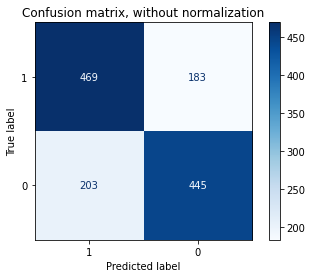

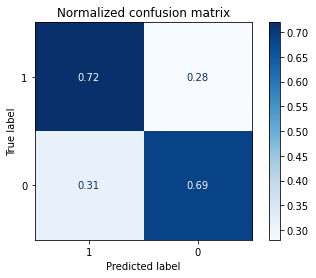

None


Confusion matrix Random Forest Scenario 1 Model 1
Confusion matrix, without normalization
[[470 182]
 [172 476]]
Confusion matrix Random Forest Scenario 1 Model 1
Normalized confusion matrix
[[0.7208589 0.2791411]
 [0.2654321 0.7345679]]


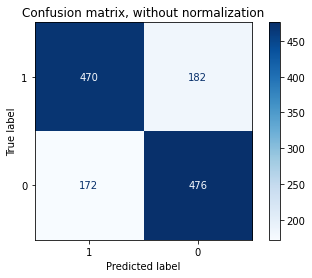

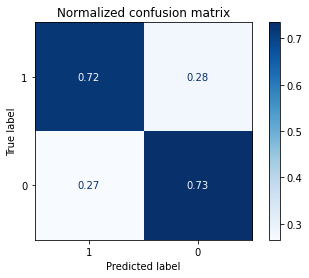

None


Total of data training 2:  3432
Total of data test 2:  1144
Accuracy KNN from Data 2:  0.8085664335664335
Accuracy Random Forest from Data 2:  0.8085664335664335


classificatio report KNN from model 2 :               precision    recall  f1-score   support

           0       0.76      0.87      0.81       550
           1       0.87      0.75      0.80       594

    accuracy                           0.81      1144
   macro avg       0.81      0.81      0.81      1144
weighted avg       0.82      0.81      0.81      1144



classificatio report Random Forest from model 2 :               precision    recall  f1-score   support

           0       0.79      0.89      0.83       550
           1       0.88      0.78      0.83       594

    accuracy                           0.83      1144
   macro avg       0.83      0.83      0.83      1144
weighted avg       0.84      0.83      0.83      1144



Confusion matrix KNN Scenario 1 Model 2
Confusion matrix, without normalization
[

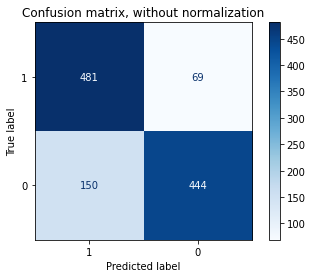

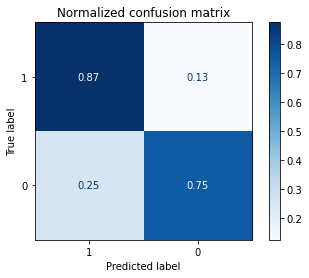

None


Confusion matrix Random Forest Scenario 1 Model 2
Confusion matrix, without normalization
[[487  63]
 [130 464]]
Confusion matrix Random Forest Scenario 1 Model 2
Normalized confusion matrix
[[0.88545455 0.11454545]
 [0.21885522 0.78114478]]


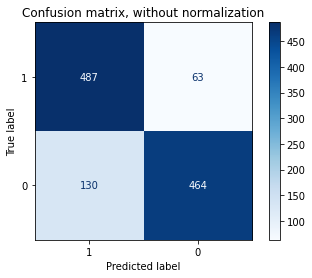

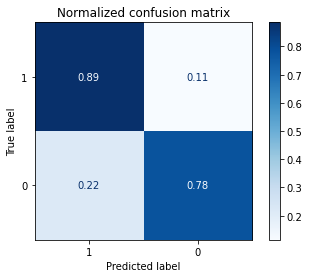

None


Total of data training 3:  2808
Total of data test 3:  936
Accuracy KNN from Data 3:  0.8632478632478633
Accuracy Random Forest from Data 3:  0.8632478632478633


classificatio report KNN from model 3 :               precision    recall  f1-score   support

           0       0.83      0.90      0.86       446
           1       0.90      0.83      0.86       490

    accuracy                           0.86       936
   macro avg       0.86      0.86      0.86       936
weighted avg       0.87      0.86      0.86       936



classificatio report Random Forest from model 3 :               precision    recall  f1-score   support

           0       0.84      0.89      0.87       446
           1       0.90      0.84      0.87       490

    accuracy                           0.87       936
   macro avg       0.87      0.87      0.87       936
weighted avg       0.87      0.87      0.87       936



Confusion matrix KNN Scenario 1 Model 3
Confusion matrix, without normalization
[[

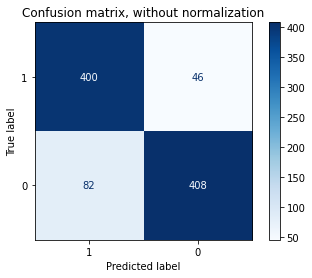

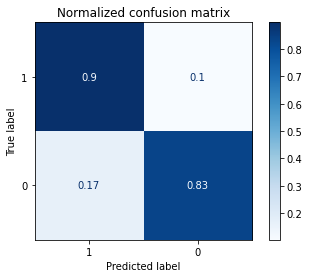

None


Confusion matrix Random Forest Scenario 1 Model 3
Confusion matrix, without normalization
[[398  48]
 [ 76 414]]
Confusion matrix Random Forest Scenario 1 Model 3
Normalized confusion matrix
[[0.89237668 0.10762332]
 [0.15510204 0.84489796]]


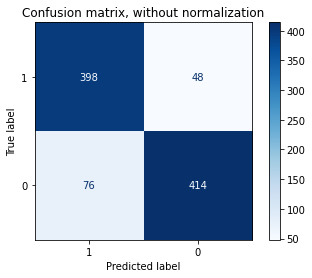

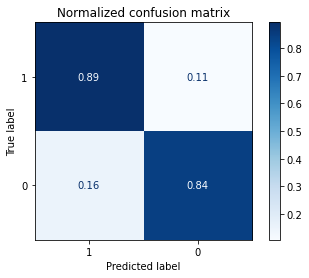

None


Total of data training 4:  4134
Total of data test 4:  1378
Accuracy KNN from Data 4:  0.795355587808418
Accuracy Random Forest from Data 4:  0.795355587808418


classificatio report KNN from model 4 :               precision    recall  f1-score   support

           0       0.75      0.87      0.80       665
           1       0.86      0.72      0.79       713

    accuracy                           0.80      1378
   macro avg       0.80      0.80      0.79      1378
weighted avg       0.80      0.80      0.79      1378



classificatio report Random Forest from model 4 :               precision    recall  f1-score   support

           0       0.75      0.91      0.82       665
           1       0.90      0.72      0.80       713

    accuracy                           0.81      1378
   macro avg       0.83      0.82      0.81      1378
weighted avg       0.83      0.81      0.81      1378



Confusion matrix KNN Scenario 1 Model 4
Confusion matrix, without normalization
[[5

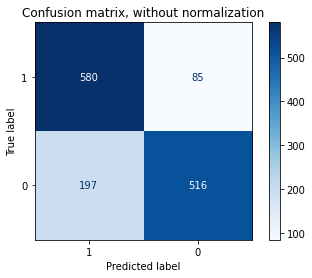

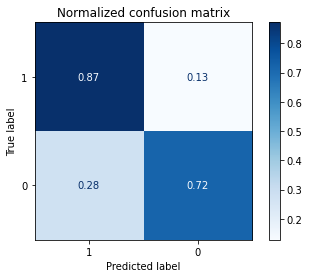

None


Confusion matrix Random Forest Scenario 1 Model 4
Confusion matrix, without normalization
[[608  57]
 [202 511]]
Confusion matrix Random Forest Scenario 1 Model 4
Normalized confusion matrix
[[0.91428571 0.08571429]
 [0.28330996 0.71669004]]


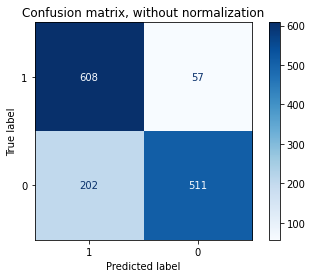

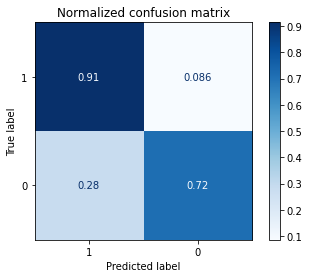

None


Total of data training 5:  2730
Total of data test 5:  910
Accuracy KNN from Data 5:  0.9483516483516483
Accuracy Random Forest from Data 5:  0.9483516483516483


classificatio report KNN from model 5 :               precision    recall  f1-score   support

           0       0.92      0.97      0.95       428
           1       0.98      0.93      0.95       482

    accuracy                           0.95       910
   macro avg       0.95      0.95      0.95       910
weighted avg       0.95      0.95      0.95       910



classificatio report Random Forest from model 5 :               precision    recall  f1-score   support

           0       0.94      0.96      0.95       428
           1       0.96      0.94      0.95       482

    accuracy                           0.95       910
   macro avg       0.95      0.95      0.95       910
weighted avg       0.95      0.95      0.95       910



Confusion matrix KNN Scenario 1 Model 5
Confusion matrix, without normalization
[[

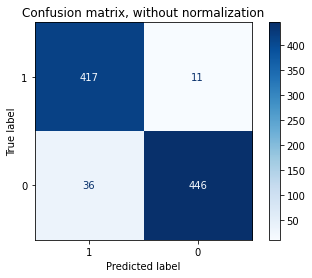

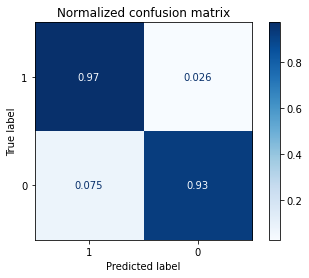

None


Confusion matrix Random Forest Scenario 1 Model 5
Confusion matrix, without normalization
[[411  17]
 [ 28 454]]
Confusion matrix Random Forest Scenario 1 Model 5
Normalized confusion matrix
[[0.96028037 0.03971963]
 [0.05809129 0.94190871]]


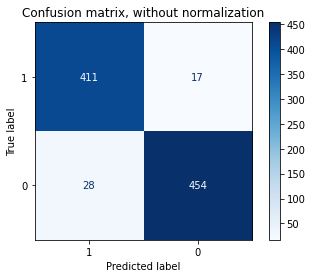

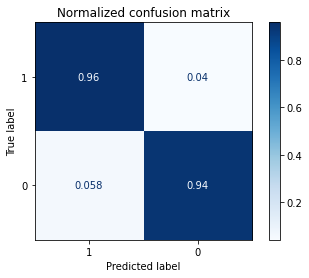

None


Total of data training 6:  2184
Total of data test 6:  728
Accuracy KNN from Data 6:  0.8296703296703297
Accuracy Random Forest from Data 6:  0.8296703296703297


classificatio report KNN from model 6 :               precision    recall  f1-score   support

           0       0.82      0.83      0.83       357
           1       0.84      0.82      0.83       371

    accuracy                           0.83       728
   macro avg       0.83      0.83      0.83       728
weighted avg       0.83      0.83      0.83       728



classificatio report Random Forest from model 6 :               precision    recall  f1-score   support

           0       0.85      0.85      0.85       357
           1       0.86      0.85      0.86       371

    accuracy                           0.85       728
   macro avg       0.85      0.85      0.85       728
weighted avg       0.85      0.85      0.85       728



Confusion matrix KNN Scenario 1 Model 6
Confusion matrix, without normalization
[[

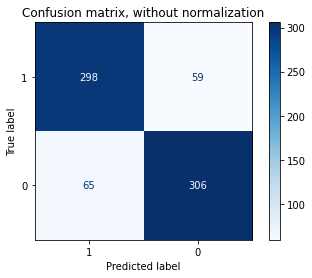

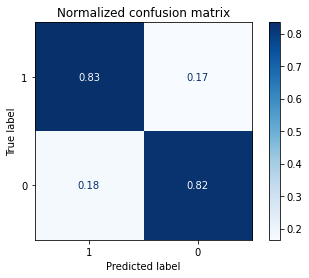

None


Confusion matrix Random Forest Scenario 1 Model 6
Confusion matrix, without normalization
[[305  52]
 [ 55 316]]
Confusion matrix Random Forest Scenario 1 Model 6
Normalized confusion matrix
[[0.85434174 0.14565826]
 [0.14824798 0.85175202]]


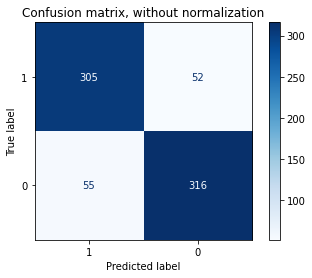

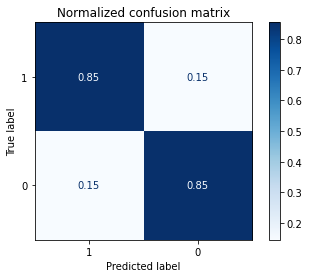

None


Total of data training 7:  2106
Total of data test 7:  702
Accuracy KNN from Data 7:  0.8547008547008547
Accuracy Random Forest from Data 7:  0.8547008547008547


classificatio report KNN from model 7 :               precision    recall  f1-score   support

           0       0.84      0.88      0.86       347
           1       0.88      0.83      0.85       355

    accuracy                           0.85       702
   macro avg       0.86      0.85      0.85       702
weighted avg       0.86      0.85      0.85       702



classificatio report Random Forest from model 7 :               precision    recall  f1-score   support

           0       0.89      0.91      0.90       347
           1       0.91      0.89      0.90       355

    accuracy                           0.90       702
   macro avg       0.90      0.90      0.90       702
weighted avg       0.90      0.90      0.90       702



Confusion matrix KNN Scenario 1 Model 7
Confusion matrix, without normalization
[[

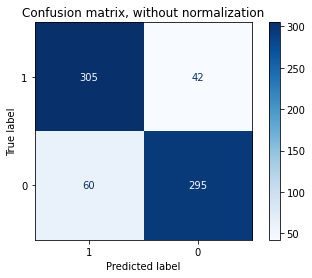

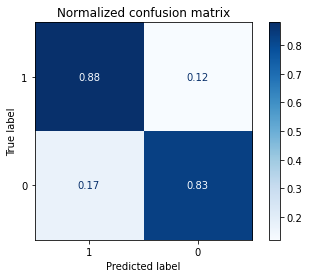

None


Confusion matrix Random Forest Scenario 1 Model 7
Confusion matrix, without normalization
[[315  32]
 [ 40 315]]
Confusion matrix Random Forest Scenario 1 Model 7
Normalized confusion matrix
[[0.90778098 0.09221902]
 [0.11267606 0.88732394]]


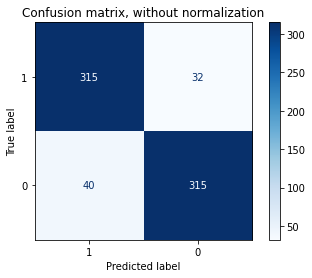

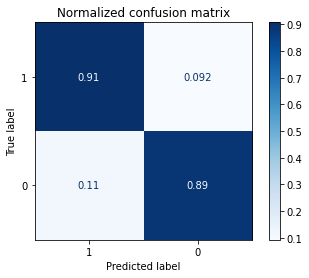

None




In [19]:
for modeln in list_pca:
  X_train, X_test, y_train, y_test = train_test_split(modeln[['PC1', 'PC2', 'PC3']], modeln[['label']], test_size=0.25, random_state=42)
  print(f"Total of data training {model_counter}: ", len(X_train))
  print(f"Total of data test {model_counter}: ", len(X_test))

  accuracy_knn = get_knn(X_train, X_test, y_train, y_test)
  accuracy_rf = get_rf(X_train, X_test, y_train, y_test)

  all_accKNN.append(accuracy_knn[0])
  all_accRF.append(accuracy_rf[0])

  print(f"Accuracy KNN from Data {model_counter}: ", accuracy_knn[0])
  print(f"Accuracy Random Forest from Data {model_counter}: ", accuracy_knn[0])

  print("\n")

  print(f"classificatio report KNN from model {model_counter} :", accuracy_knn[2]) 
  print("\n")

  print(f"classificatio report Random Forest from model {model_counter} :", accuracy_rf[2]) 
  print("\n")
  

  print(disp_confmatrix_knn(accuracy_knn[3], X_test, y_test, model_counter)) 
  print("\n")

  print(disp_confmatrix_rf(accuracy_rf[3], X_test, y_test, model_counter))
  print("\n")

  

  model_counter += 1

In [20]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=[0, 1, 2, 3, 4, 5, 6, 7, 8],
    y=all_accKNN,
    name="Accuracy KNN"       # this sets its legend entry
))


fig.add_trace(go.Scatter(
    x=[0, 1, 2, 3, 4, 5, 6, 7, 8],
    y=all_accRF,
    name="Accuracy RF"
))

fig.update_layout(
    title="All Accuracy from each data both KNN and Random Forest in Scenario 1",
    xaxis_title="Data (DF)",
    yaxis_title="Accuracy Score",
    legend_title="Legend Title",
    
)

fig.show()

According to the graphic, from all model in scenario 1, looks like the Random Forest is the greatest model with 95% accuracy.

In [21]:
# cm_counter = 1

## Scenario 2

in Scenario 2, simply has the similarity to scenario 1 for the feature extraction using the PCA, but after each dataset has passed the PCA process, the result of each PCA of the dataset will be gathered as one dataframe, so for the modeling process, the author will use that dataframe after gather from all PCA process.

### Feature Extraction

Cause we already got extracted feature using PCA for each dataset, now we just need only the list of the PCA result from the scenario 1.

In [22]:
# list_pca = [pca_df1, pca_df2, pca_df3, pca_df4, pca_df5, pca_df6, pca_df7]
result_allPCA = pd.concat(list_pca).reset_index()

In [23]:
x_pca_scene2 = result_allPCA[['PC1', 'PC2', 'PC3']]
y_pca_scene2 = result_allPCA[['label']]

### Modelling Scenario 2

In [24]:
X_train, X_test, y_train, y_test = train_test_split(x_pca_scene2, y_pca_scene2, test_size=0.25, random_state=42)
print("Total of data training: ", len(X_train))
print("Total of data test: ", len(X_test))

Total of data training:  21294
Total of data test:  7098


#### KNN Classifier Scenario 2

In [25]:
knn = KNeighborsClassifier(n_neighbors=6,
                           weights="distance",
                           leaf_size=30,
                           metric="minkowski")
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6, weights='distance')

In [26]:
y_pred = knn.predict(X_test)
print("Accuracy KNN Scenario 2 = ", accuracy_score(y_test, y_pred))

Accuracy KNN Scenario 2 =  0.8048746125669203


In [27]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2983  552]
 [ 833 2730]]
              precision    recall  f1-score   support

           0       0.78      0.84      0.81      3535
           1       0.83      0.77      0.80      3563

    accuracy                           0.80      7098
   macro avg       0.81      0.81      0.80      7098
weighted avg       0.81      0.80      0.80      7098



Confusion matrix KNN Scenario 2
Confusion matrix, without normalization
[[2983  552]
 [ 833 2730]]
Confusion matrix KNN Scenario 2
Normalized confusion matrix
[[0.84384724 0.15615276]
 [0.23379175 0.76620825]]


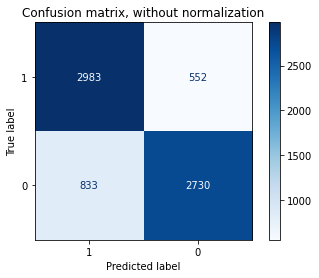

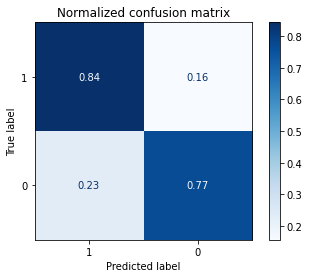

In [28]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(knn, X_test, y_test,
                                 display_labels=['1', '0'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print('Confusion matrix KNN Scenario 2')
    print(title)
    print(disp.confusion_matrix)

plt.show()

#### Random Forest Classifier Scenario 2

In [29]:
clf = RandomForestClassifier(
    n_estimators=20,
    min_samples_split=5,
    min_samples_leaf=1,
    max_depth=10,
    bootstrap=True
)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=20)

In [30]:
y_pred = clf.predict(X_test)

#print("Akurasi", accuracy_score(y_test, y_pred))
print("Accuracy Random Forest Scenario 2 = ", accuracy_score(y_test, y_pred))

Accuracy Random Forest Scenario 2 =  0.8245984784446323


In [31]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3050  485]
 [ 760 2803]]
              precision    recall  f1-score   support

           0       0.80      0.86      0.83      3535
           1       0.85      0.79      0.82      3563

    accuracy                           0.82      7098
   macro avg       0.83      0.82      0.82      7098
weighted avg       0.83      0.82      0.82      7098



Confusion matrix Random Forest Scenario 2
Confusion matrix, without normalization
[[3050  485]
 [ 760 2803]]
Confusion matrix Random Forest Scenario 2
Normalized confusion matrix
[[0.86280057 0.13719943]
 [0.2133034  0.7866966 ]]


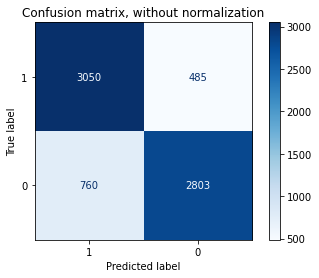

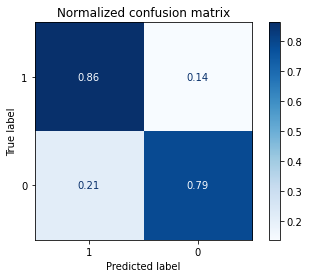

In [32]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=['1', '0'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print('Confusion matrix Random Forest Scenario 2')
    print(title)
    print(disp.confusion_matrix)

plt.show()

## Scenario 3

in Scenario 3. All the dataset will be concatenated in the first place, so there will be only one dataframe, from the feature extraction using PCA until modeling process done.

### Feature Extraction

As we plan in the proposed methods, in this section, the author will use the Principal Component Analysis (PCA) to get feature extraction and reducing computational on modelling process, so the data can be proceed to next step. in Scenario 3 we will use all the dataset to get extraction feature by PCA

In [33]:
### Concatenate all dataset in one variable
all_dataset = pd.concat(list_dataset).reset_index()

In [34]:
## getting feature from gathered dataset
data_feature = ['x', 'y', 'z']
data_label = ['label']
all_dataset_feature = all_dataset.loc[:, data_feature].values
all_dataset_label = all_dataset.loc[:, data_label].values

In [35]:
x_all_dataset = StandardScaler().fit_transform(all_dataset_feature)
pca = PCA(n_components=3)
all_data_components = pca.fit_transform(x_all_dataset)

### component after pca creating new dataframe, concate with label, then split in the next process for modelling
all_data_principalDF = pd.DataFrame(data=all_data_components, columns = ['PC1', 'PC2', 'PC3'])

## new dataframe for modelling, ready to split
pca_all_data = pd.concat([all_data_principalDF, all_dataset[['label']]], axis=1)
print(pca_all_data)

            PC1       PC2       PC3  label
0     -1.179320  0.708346 -0.231827      1
1     -0.731818  1.361170 -1.389438      1
2     -0.242844  1.091875 -1.701013      1
3      0.371863 -0.124829 -1.250942      1
4      0.033811 -1.753395 -0.572141      1
...         ...       ...       ...    ...
28387 -0.593642 -0.106077 -0.107390      0
28388  0.254284 -0.379269 -0.059402      0
28389  0.714079 -0.290897  0.021001      0
28390  0.752726 -0.031464 -0.194255      0
28391  0.078798  0.215464 -0.236742      0

[28392 rows x 4 columns]


In [36]:
total_var = pca.explained_variance_ratio_.sum() * 100
fig = px.scatter_3d(
    all_data_components, x=0, y=1, z=2, color=all_dataset['label'],  color_continuous_scale=['magenta', 'orange'],
    title='Visualize PCA Result: All Dataset',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

In [37]:
### Split preparation, 
### x_pca is feature result from PCA in a dataframe, 
### and y is the label from the dataset
x_pca_all_data = pca_all_data[['PC1', 'PC2', 'PC3']]
y_pca_all_data = pca_all_data[['label']]

### Modelling Scenario 3: All Dataset

In [38]:
X_train, X_test, y_train, y_test = train_test_split(x_pca_all_data, y_pca_all_data, test_size=0.25, random_state=42)
print("Total of data training: ", len(X_train))
print("Total of data test: ", len(X_test))

Total of data training:  21294
Total of data test:  7098


#### KNN Classifier Scenario 3

In [39]:
knn = KNeighborsClassifier(n_neighbors=6,
                           weights="distance",
                           leaf_size=30,
                           metric="minkowski")
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6, weights='distance')

In [40]:
y_pred = knn.predict(X_test)
print("Accuracy KNN Scenario 3 = ", accuracy_score(y_test, y_pred))

Accuracy KNN Scenario 3 =  0.7786700479008172


In [41]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3001  534]
 [1037 2526]]
              precision    recall  f1-score   support

           0       0.74      0.85      0.79      3535
           1       0.83      0.71      0.76      3563

    accuracy                           0.78      7098
   macro avg       0.78      0.78      0.78      7098
weighted avg       0.78      0.78      0.78      7098



Confusion matrix KNN Scenario 3
Confusion matrix, without normalization
[[3001  534]
 [1037 2526]]
Confusion matrix KNN Scenario 3
Normalized confusion matrix
[[0.84893918 0.15106082]
 [0.29104687 0.70895313]]


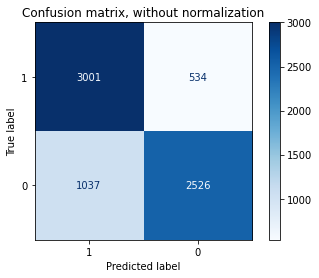

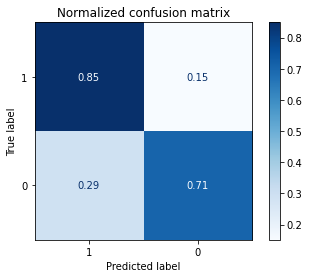

In [42]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(knn, X_test, y_test,
                                 display_labels=['1', '0'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print('Confusion matrix KNN Scenario 3')
    print(title)
    print(disp.confusion_matrix)

plt.show()

#### Random Forest Classifier Scenario 3

In [43]:
clf = RandomForestClassifier(
    n_estimators=20,
    min_samples_split=5,
    min_samples_leaf=1,
    max_depth=10,
    bootstrap=True
)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=20)

In [44]:
y_pred = clf.predict(X_test)

#print("Akurasi", accuracy_score(y_test, y_pred))
print("Accuracy Random Forest Scenario 3 =", accuracy_score(y_test, y_pred))

Accuracy Random Forest Scenario 3 = 0.8057199211045365


In [45]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3013  522]
 [ 857 2706]]
              precision    recall  f1-score   support

           0       0.78      0.85      0.81      3535
           1       0.84      0.76      0.80      3563

    accuracy                           0.81      7098
   macro avg       0.81      0.81      0.81      7098
weighted avg       0.81      0.81      0.81      7098



Confusion matrix Random Forest Scenario 3
Confusion matrix, without normalization
[[3013  522]
 [ 857 2706]]
Confusion matrix Random Forest Scenario 3
Normalized confusion matrix
[[0.8523338  0.1476662 ]
 [0.24052765 0.75947235]]


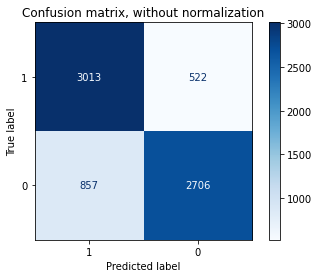

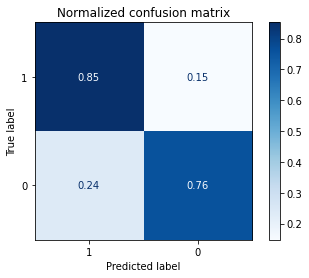

In [46]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=['1', '0'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print('Confusion matrix Random Forest Scenario 3')
    print(title)
    print(disp.confusion_matrix)

plt.show()

## Conclusion

In this Challenge, From all the Scenarios that have been implemented, so far Random Forest Model 5 from Scenario 1 is the greatest model, with 95% accuracy. However, unlike any other scenario, scenario 1 has the consistency of testing, the accuracy shows increasing, starting from model result using data 1 until data 5, both KNN and Random Forest. In the lesson that the author learns, Random Forest has the ability to make the machine learning model for fish-eating classification. 


In further research, the author will try using Deep learning, to know there is a possibility of increasing the performance of this dataset.